In [1]:
from matplotlib import pyplot as plt
import numpy as np

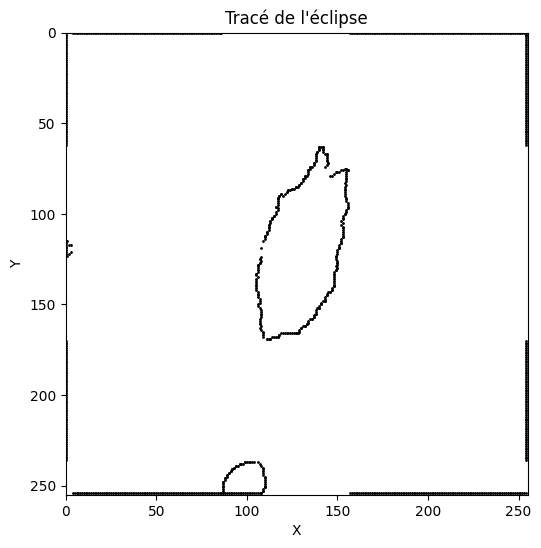

In [2]:
with open('contour_points.txt', 'r') as file:
    coordinates = [tuple(map(int, line.split(','))) for line in file.readlines()]

y_coords, x_coords = zip(*coordinates)

plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, color='black', s=1)  # Tracer les points
plt.xlim(0, 255)
plt.ylim(0, 255)

plt.gca().invert_yaxis()

plt.gca().set_aspect('equal', adjustable='box')


plt.title('Tracé de l\'éclipse')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [3]:
def group_contour_points(contour_points, max_distance=10):
    """Regroupe les points de contour en fonction de leur proximité."""
    groups = []
    visited = np.zeros(len(contour_points), dtype=bool)
    
    def euclidean_distance(p1, p2):
        """Calcule la distance euclidienne entre deux points."""
        return np.sqrt(np.sum((np.array(p1) - np.array(p2))**2))

    for i, point in enumerate(contour_points):
        if visited[i]:
            continue
        # Créer un nouveau groupe
        group = [point]
        visited[i] = True
        
        # Chercher les voisins de ce point pour les ajouter au groupe
        stack = [point]
        while stack:
            p = stack.pop()
            for j, q in enumerate(contour_points):
                if not visited[j] and euclidean_distance(p, q) < max_distance:
                    group.append(q)
                    visited[j] = True
                    stack.append(q)
        
        # Ajouter le groupe trouvé
        groups.append(np.array(group))
    
    return groups

In [4]:
groups = group_contour_points(coordinates)

/tmp/ipykernel_114488/2782195941.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(groups))


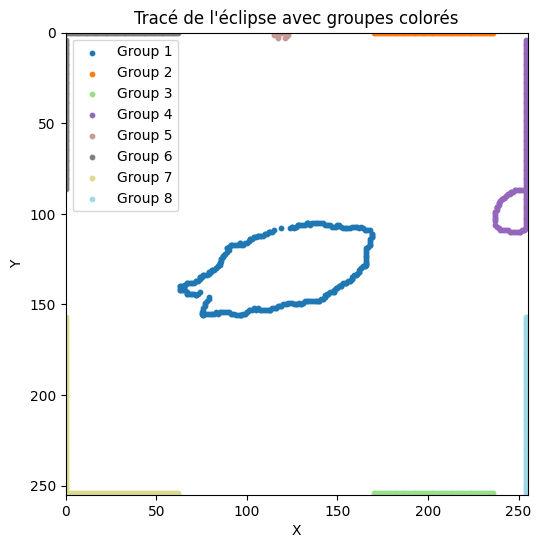

In [5]:
colors = plt.cm.get_cmap('tab20', len(groups))

plt.figure(figsize=(6, 6))
for i, group in enumerate(groups):
    x, y = zip(*group)
    plt.scatter(x, y, color=colors(i), s=10, label=f'Group {i+1}')

plt.xlim(0, 255)
plt.ylim(0, 255)
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Tracé de l\'éclipse avec groupes colorés')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [6]:
def select_group_near_center(groups, center_y, center_x):
    """Sélectionne le groupe le plus proche du centre de l'image."""
    min_distance = float('inf')
    selected_group = None
    
    for group in groups:
        distances = np.linalg.norm(group - np.array([center_y, center_x]), axis=1)
        avg_distance = np.mean(distances)
        
        if avg_distance < min_distance:
            min_distance = avg_distance
            selected_group = group
    
    return selected_group

In [7]:
group = select_group_near_center(groups, 128, 128)

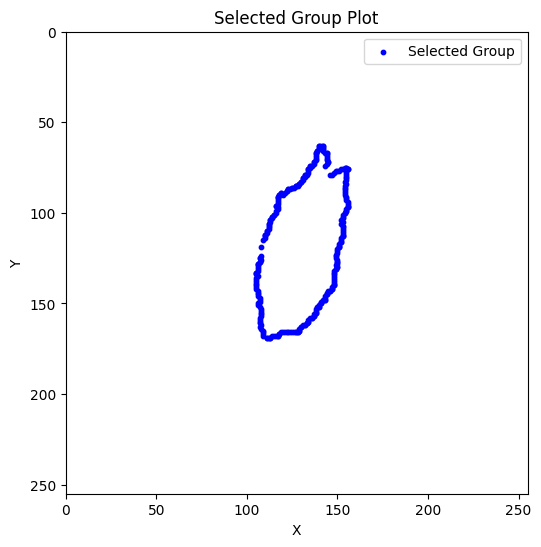

In [11]:
plt.figure(figsize=(6, 6))
y, x = zip(*group)
plt.scatter(x, y, color='blue', s=10, label='Selected Group')

plt.xlim(0, 255)
plt.ylim(0, 255)
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Selected Group Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

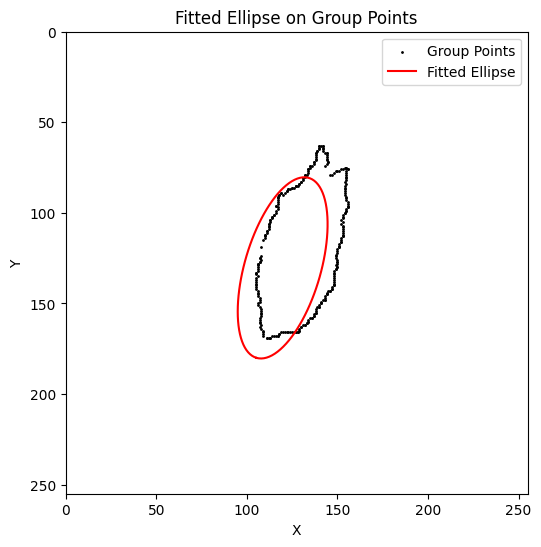

In [12]:
from skimage.measure import EllipseModel

# Extract x and y coordinates from the group
group_y, group_x = zip(*group)

# Fit the ellipse on the points inside the group
ellipse = EllipseModel()
ellipse.estimate(np.column_stack((group_x, group_y)))

# Get the parameters of the fitted ellipse
yc, xc, a, b, theta = ellipse.params

# Generate points for the fitted ellipse
t = np.linspace(0, 2 * np.pi, 100)
ellipse_x = xc + a * np.cos(t) * np.cos(theta) - b * np.sin(t) * np.sin(theta)
ellipse_y = yc + a * np.cos(t) * np.sin(theta) + b * np.sin(t) * np.cos(theta)

# Plot the points inside the group and the fitted ellipse
plt.figure(figsize=(6, 6))
plt.scatter(group_x, group_y, color='black', s=1, label='Group Points')
plt.plot(ellipse_x, ellipse_y, color='red', label='Fitted Ellipse')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Fitted Ellipse on Group Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()